In [621]:
File_PATH = 'data/salesforecast_analytics.csv'
DOC_PATH = 'splited data/'

In [622]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,MinMaxScaler,StandardScaler,PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer

In [623]:
df = pd.read_csv(File_PATH)
df.head()



,Date,Year,Month,Customer Age,Customer Gender,Country,State,Product Category,Sub Category,Quantity,Unit Cost,Unit Price,Cost,Revenue,Day,weekday,Gross Profit,Gross Margin,Return on Investment (ROI),Unit Profit
0,2016-02-19,2016,February,29,F,United States,Washington,Accessories,Tires and Tubes,1,80.00,109.000000,80.0,109.0,19,4,29.0,26.605505,36.250000,29.000000
1,2016-02-20,2016,February,29,F,United States,Washington,Clothing,Gloves,2,24.50,28.500000,49.0,57.0,20,5,8.0,14.035088,16.326531,4.000000
2,2016-02-27,2016,February,29,F,United States,Washington,Accessories,Tires and Tubes,3,3.67,5.000000,11.0,15.0,27,5,4.0,26.666667,36.363636,1.330000
3,2016-03-12,2016,March,29,F,United States,Washington,Accessories,Tires and Tubes,2,87.50,116.500000,175.0,233.0,12,5,58.0,24.892704,33.142857,29.000000
4,2016-03-12,2016,March,29,F,United States,Washington,Accessories,Tires and Tubes,3,35.00,41.666667,105.0,125.0,12,5,20.0,16.000000,19.047619,6.666667


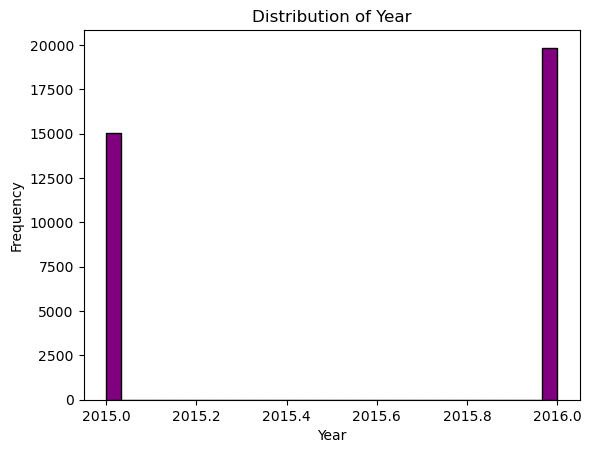

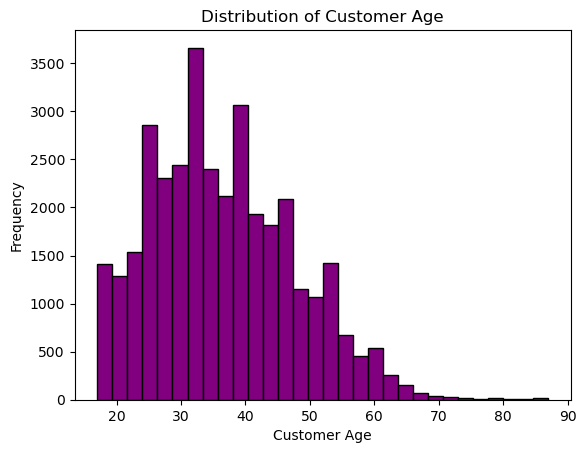

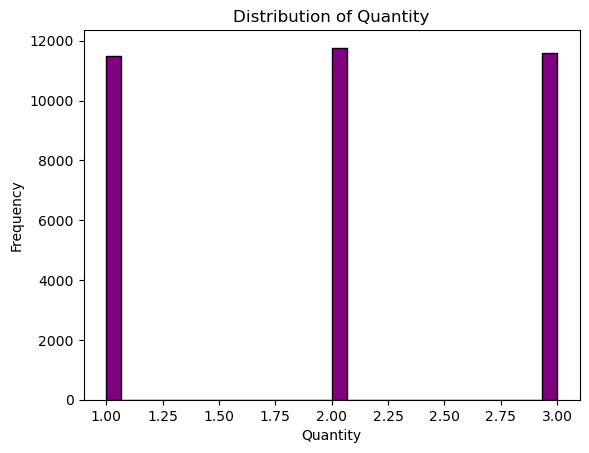

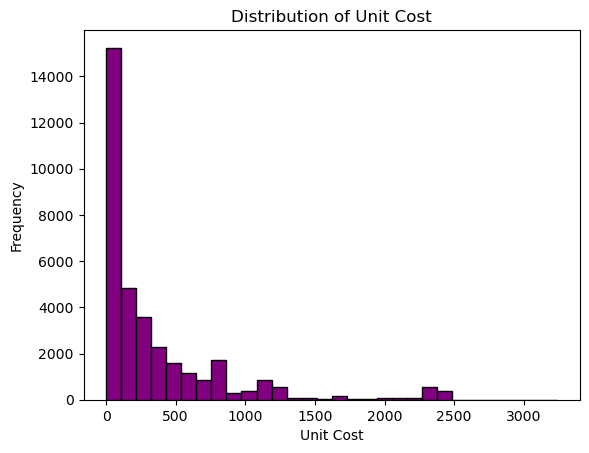

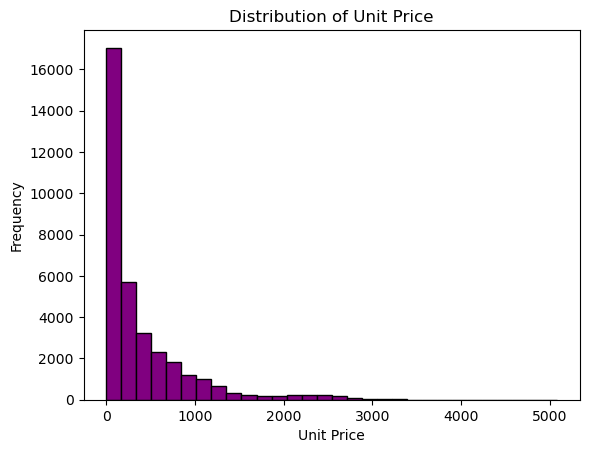

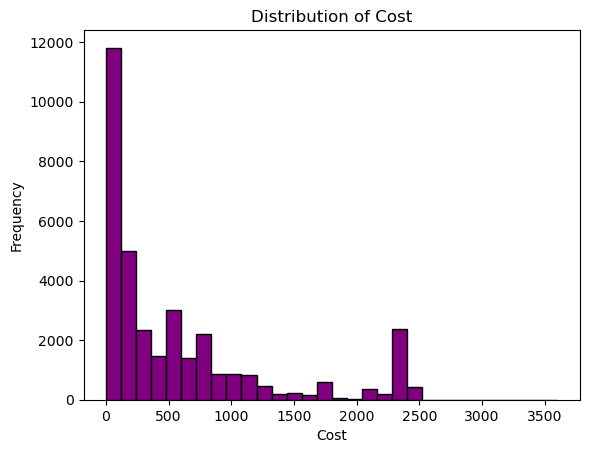

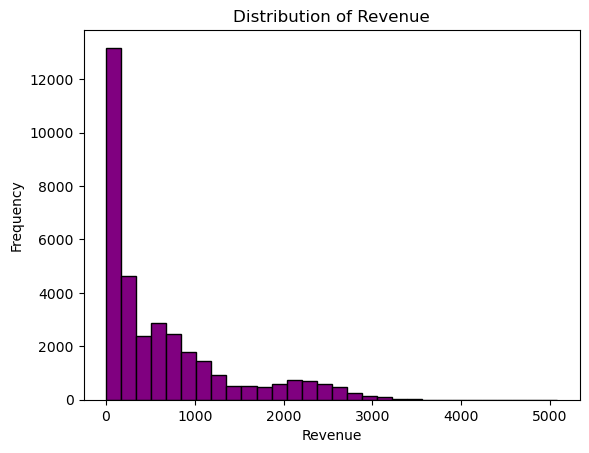

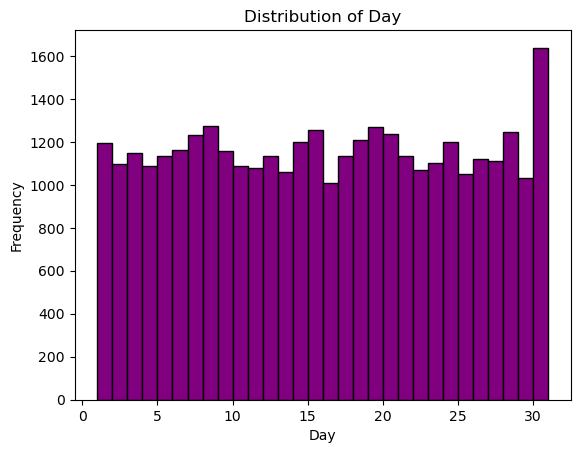

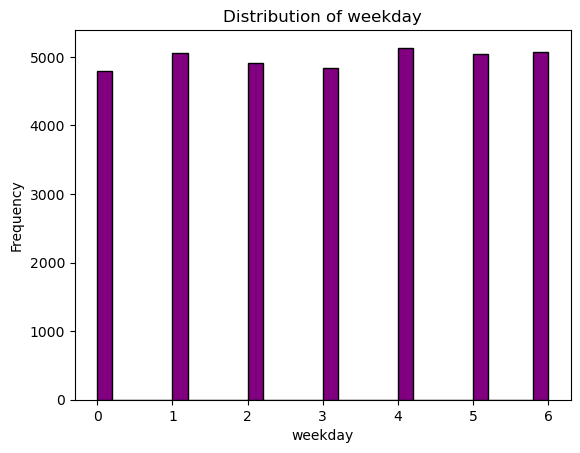

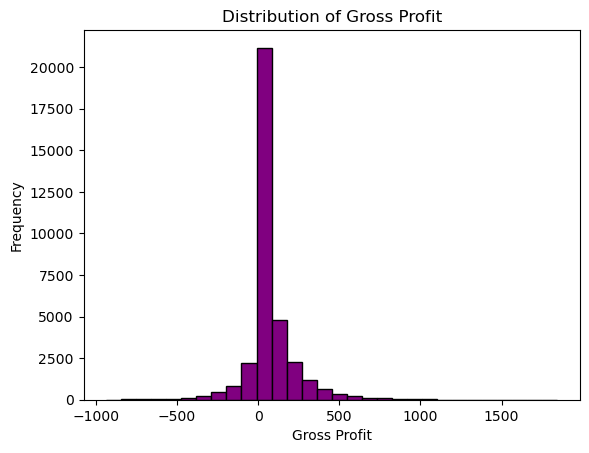

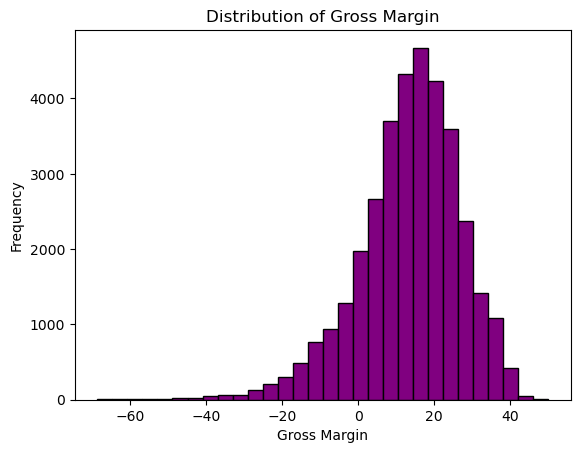

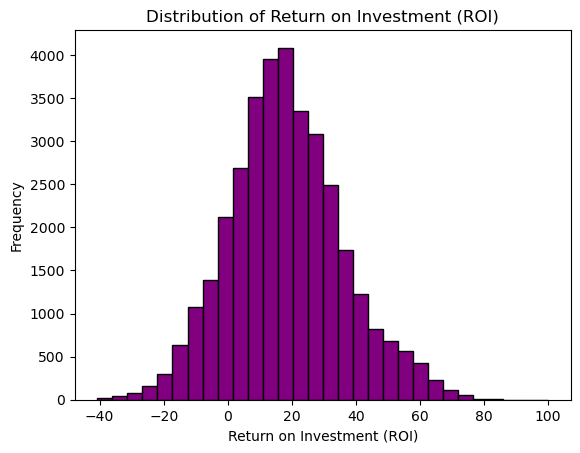

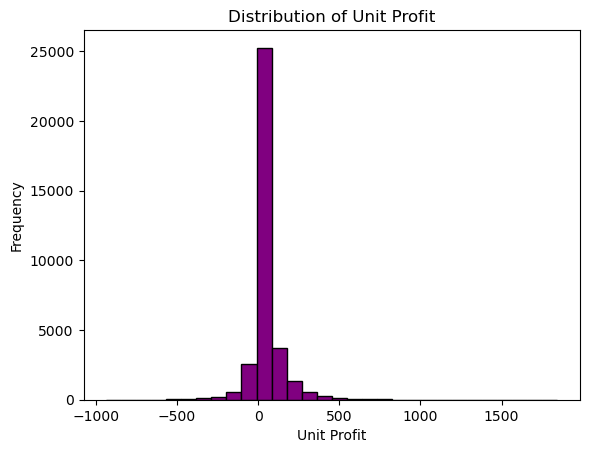

In [624]:
int_col = df.select_dtypes(include=['int64','float'])
for i in int_col:
    column_name = i
    plt.hist(df[column_name], bins=30, color='purple', edgecolor='black')
    plt.title(f'Distribution of {column_name}')
    plt.xlabel(column_name)
    plt.ylabel('Frequency')
    plt.show()

In [625]:
age_bin=[8,12,19,30,50,90]
age_group=['child','teenger','young adult','middel aged','senior citizen']
df['Age Category'] = pd.cut(df['Customer Age'],bins=age_bin,labels=age_group)

In [626]:
df['Age Category'].value_counts()

middel aged       18757
young adult       10428
senior citizen     4268
teenger            1413
child                 0
Name: Age Category, dtype: int64

In [627]:
right_skewed = ['Unit Cost', 'Unit Price', 'Cost', 'Revenue']

for col in right_skewed:
    df[col] = np.log1p(df[col])


In [628]:
# import numpy as np

# left_skewed = ['Gross Margin']

# for col in left_skewed:
#     df[col] = np.exp(df[col] )


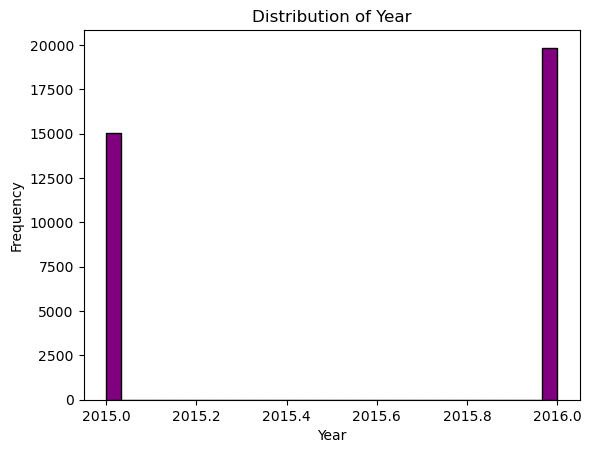

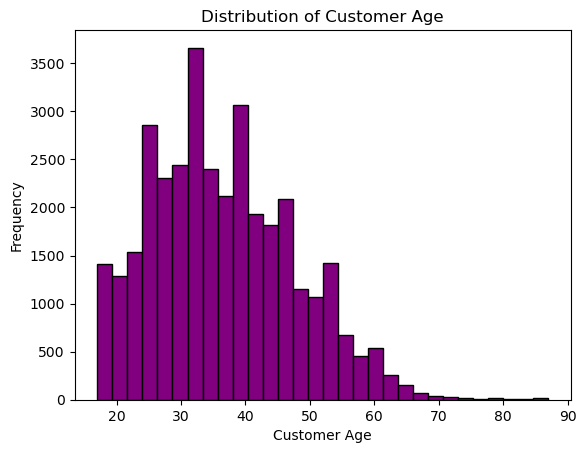

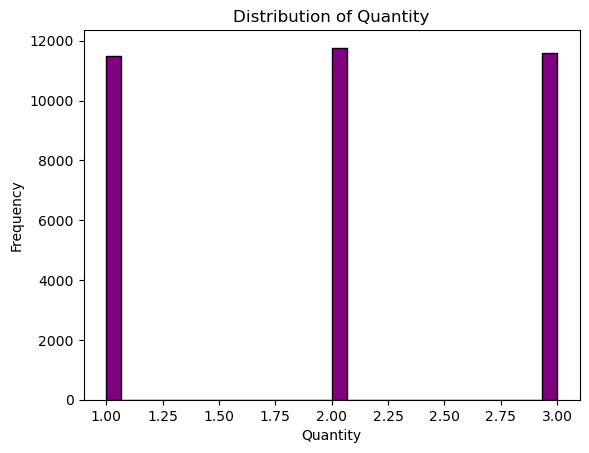

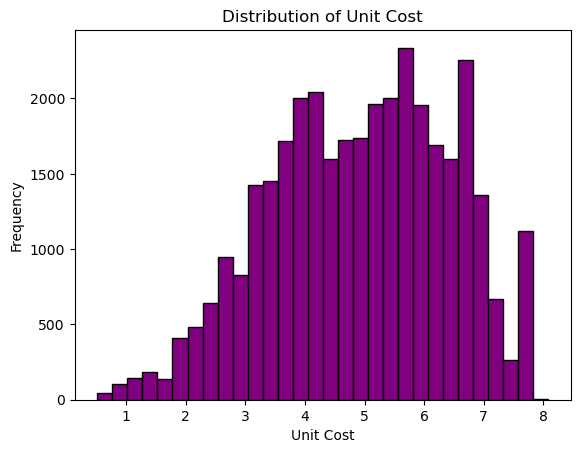

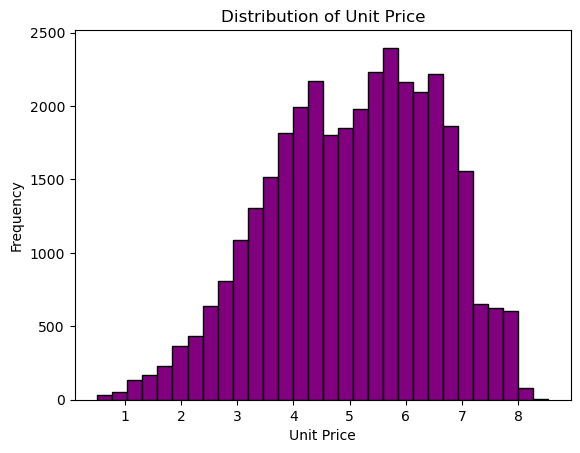

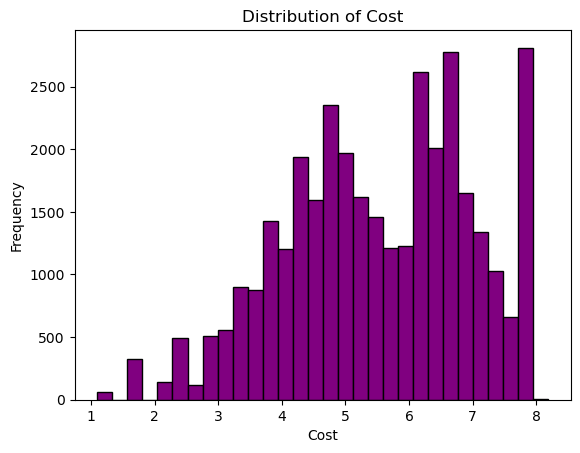

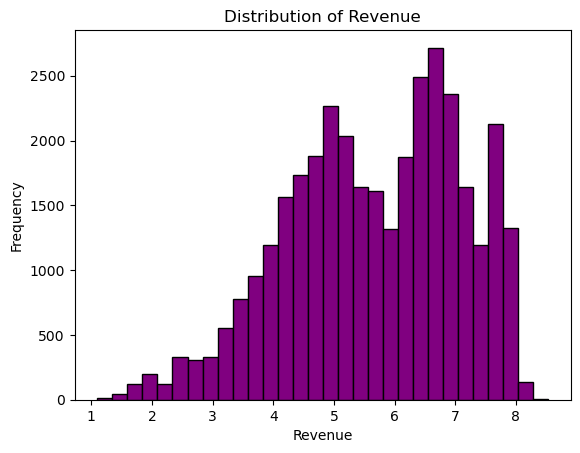

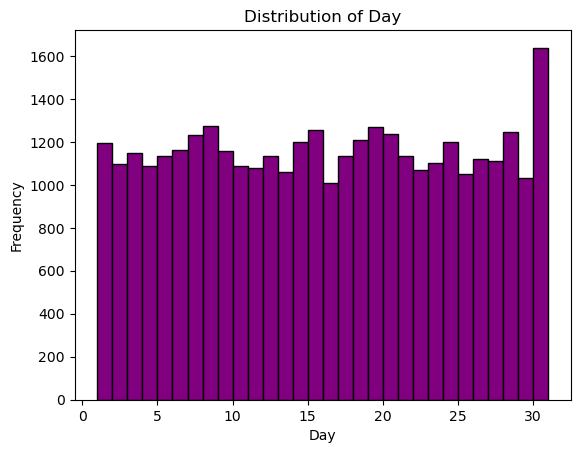

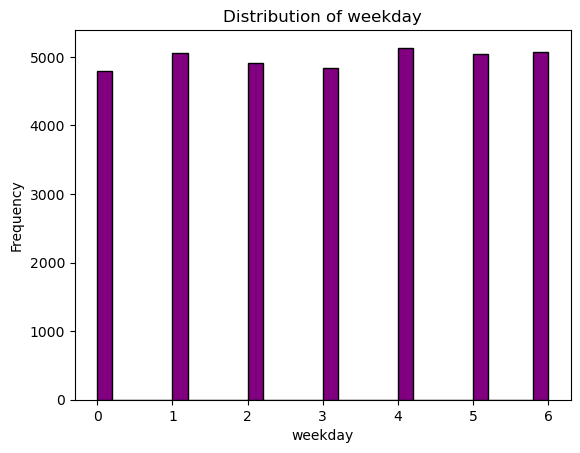

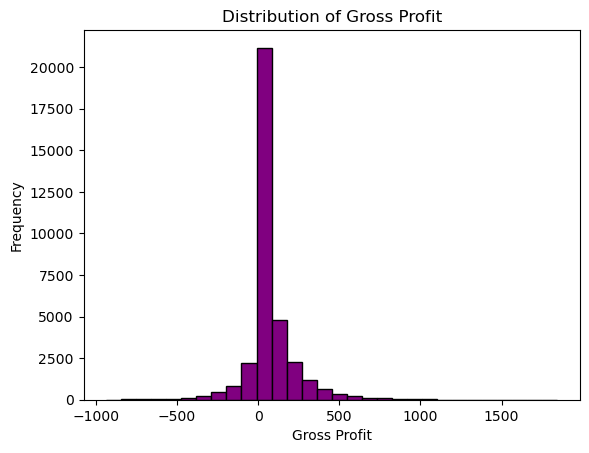

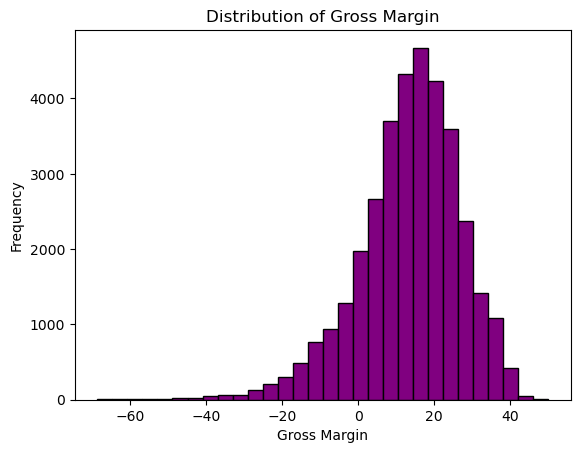

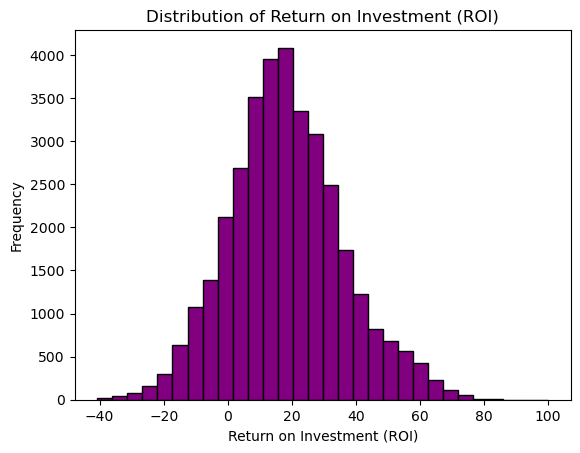

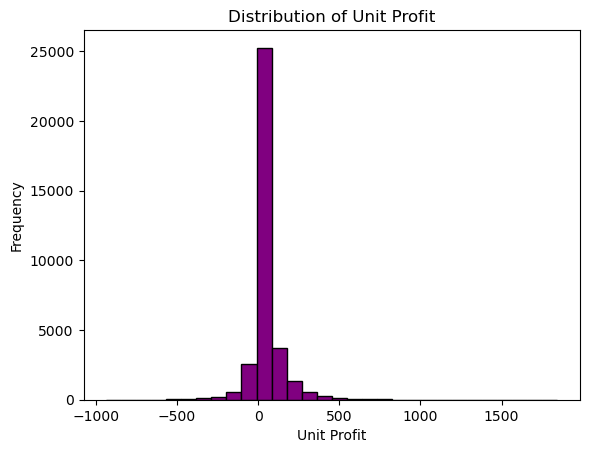

In [629]:
int_col = df.select_dtypes(include=['int64','float'])
for i in int_col:
    column_name = i
    plt.hist(df[column_name], bins=30, color='purple', edgecolor='black')
    plt.title(f'Distribution of {column_name}')
    plt.xlabel(column_name)
    plt.ylabel('Frequency')
    plt.show()

In [630]:
df.head()

,Date,Year,Month,Customer Age,Customer Gender,Country,State,Product Category,Sub Category,Quantity,...,Unit Price,Cost,Revenue,Day,weekday,Gross Profit,Gross Margin,Return on Investment (ROI),Unit Profit,Age Category
0,2016-02-19,2016,February,29,F,United States,Washington,Accessories,Tires and Tubes,1,...,4.700480,4.394449,4.700480,19,4,29.0,26.605505,36.250000,29.000000,young adult
1,2016-02-20,2016,February,29,F,United States,Washington,Clothing,Gloves,2,...,3.384390,3.912023,4.060443,20,5,8.0,14.035088,16.326531,4.000000,young adult
2,2016-02-27,2016,February,29,F,United States,Washington,Accessories,Tires and Tubes,3,...,1.791759,2.484907,2.772589,27,5,4.0,26.666667,36.363636,1.330000,young adult
3,2016-03-12,2016,March,29,F,United States,Washington,Accessories,Tires and Tubes,2,...,4.766438,5.170484,5.455321,12,5,58.0,24.892704,33.142857,29.000000,young adult
4,2016-03-12,2016,March,29,F,United States,Washington,Accessories,Tires and Tubes,3,...,3.753418,4.663439,4.836282,12,5,20.0,16.000000,19.047619,6.666667,young adult


In [631]:
features=df.drop(columns={'Unit Profit'})
categorical_cols = features.select_dtypes(include=['object','category']).columns
numerical_cols = ['Unit Price','Cost','Revenue','Gross Profit',	'Gross Margin',	'Return on Investment (ROI)']
y=df['Unit Profit']

In [632]:
sc = StandardScaler()

In [633]:
df[numerical_cols] = sc.fit_transform(df[numerical_cols])

In [634]:
lb = LabelEncoder()

df[categorical_cols] = df[categorical_cols].apply(lambda col:lb.fit_transform(col))

In [635]:
df.head()

,Date,Year,Month,Customer Age,Customer Gender,Country,State,Product Category,Sub Category,Quantity,...,Unit Price,Cost,Revenue,Day,weekday,Gross Profit,Gross Margin,Return on Investment (ROI),Unit Profit,Age Category
0,413,2016,3,29,0,3,42,0,14,1,...,-0.255451,-0.765780,-0.676268,19,4,-0.234603,0.974419,1.013221,29.000000,3
1,414,2016,3,29,0,3,42,2,6,2,...,-1.143561,-1.095526,-1.123435,20,5,-0.371968,0.046323,-0.104982,4.000000,3
2,421,2016,3,29,0,3,42,0,14,3,...,-2.218284,-2.070982,-2.023203,27,5,-0.398132,0.978935,1.019598,1.330000,3
3,434,2016,7,29,0,3,42,0,14,2,...,-0.210942,-0.235349,-0.148893,12,5,-0.044909,0.847960,0.838832,29.000000,3
4,434,2016,7,29,0,3,42,0,14,3,...,-0.894538,-0.581922,-0.581389,12,5,-0.293473,0.191396,0.047738,6.666667,3


In [636]:
X=df.drop(columns={'Unit Profit'})
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34866 entries, 0 to 34865
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Date                        34866 non-null  int32  
 1   Year                        34866 non-null  int64  
 2   Month                       34866 non-null  int32  
 3   Customer Age                34866 non-null  int64  
 4   Customer Gender             34866 non-null  int32  
 5   Country                     34866 non-null  int32  
 6   State                       34866 non-null  int32  
 7   Product Category            34866 non-null  int32  
 8   Sub Category                34866 non-null  int32  
 9   Quantity                    34866 non-null  int64  
 10  Unit Cost                   34866 non-null  float64
 11  Unit Price                  34866 non-null  float64
 12  Cost                        34866 non-null  float64
 13  Revenue                     348

In [637]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,shuffle=True)

In [638]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((27892, 20), (6974, 20), (27892,), (6974,))

In [639]:
X_train.to_pickle(path='{}/X_train.pkl'.format(DOC_PATH))
X_test.to_pickle(path='{}/X_test.pkl'.format(DOC_PATH))
y_train.to_pickle(path='{}/y_train.pkl'.format(DOC_PATH))
y_test.to_pickle(path='{}/y_test.pkl'.format(DOC_PATH))